This program takes user-inputted coordinate pairs and derivatives and outputs the equations and graphs of different types of piecewise functions that model a roller coaster.
A note to the user: If the derivative points given are not extrema, only the cubic function will output a valid roller coaster function.
Please enter your first coordinate pair: 0,10
Please enter your next coordinate pair (or 'False' if there are no more points): 4,2
Please enter your next coordinate pair (or 'False' if there are no more points): 8,8
Please enter your next coordinate pair (or 'False' if there are no more points): 15,0
Please enter your next coordinate pair (or 'False' if there are no more points): False
Please enter your first derivative in the form 'x, f'(x)': 0,0
Please enter your next derivative (or 'False' if there are no more derivatives): 4,0
Please enter your next derivative (or 'False' if there are no more derivatives): 8,0
Please enter your next derivative (or 'False' if there are no more 

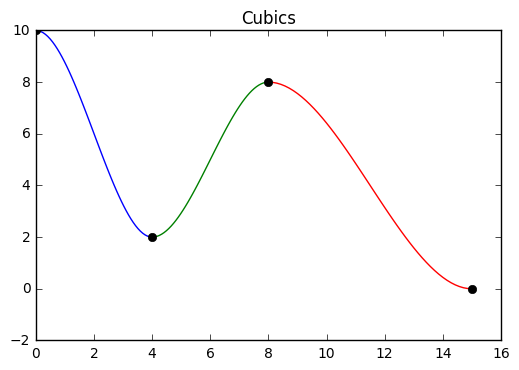

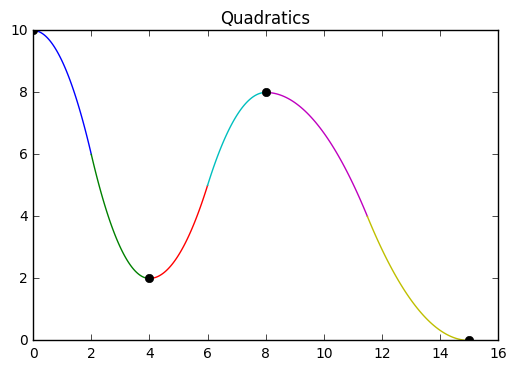

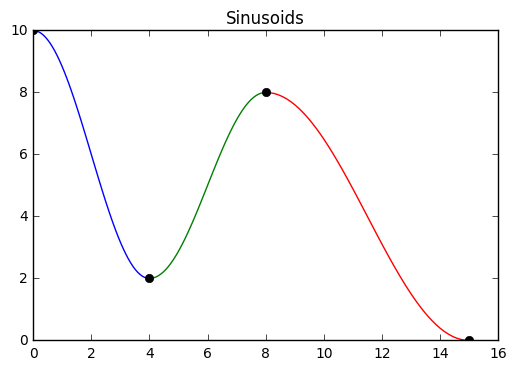

In [11]:
'Program to take user-inputted points to output a piecewise function that models a roller coaster.'

import numpy as np
import matplotlib.pyplot as plt

def getPoints():
	points = [1]
	points[0] = input("Please enter your first coordinate pair: ")
	newPoint = True
	while newPoint:
		newPoint = input("Please enter your next coordinate pair (or 'False' if there are no more points): ")
		if newPoint:
			points.append(newPoint)
	points.sort()
	points = [(float(x),float(y)) for (x,y) in points]
	return points

def getDevs():
	devs = [1]
	devs[0] = input("Please enter your first derivative in the form 'x, f'(x)': ")
	newDev = True
	while newDev:
		newDev = input("Please enter your next derivative (or 'False' if there are no more derivatives): ")
		if newDev:
			devs.append(newDev)
	devs.sort()
	devs = [(float(x),float(y)) for (x,y) in devs]
	return devs

def Cubics(points,devs):
	print("***CUBICS***")
	C = np.array([]).reshape(0,4)
	for i in range(0,(len(devs)-1)):
		A = np.array([[points[i][0]**3,points[i][0]**2,points[i][0],1],[points[i+1][0]**3,points[i+1][0]**2,points[i+1][0],1],[3*devs[i][0]**2,2*devs[i][0],1,0],[3*devs[i+1][0]**2,2*devs[i+1][0],1,0]])
		B = np.array([points[i][1],points[i+1][1],devs[i][1],devs[i+1][1]])
		C = np.vstack([C, [np.linalg.tensorsolve(A,B)]])
		print("For x in [" + str(points[i][0]) + "," + str(points[i+1][0]) + "]:")
		print("y = " + str(C[i][0]) + "x^3 + " + str(C[i][1]) + "x^2 + " + str(C[i][2]) + "x + " + str(C[i][3]))
	return C

def Quadratics(points,devs):
	print("***QUADRATICS***")
	quadDevs = list(devs)
	quadDevs += devs
	quadDevs.sort()
	quadDevs.pop(0)
	quadDevs.pop()
	quadPoints = list(points)
	for i in range(0,(len(points)-1)):
		midpoint = (((points[i][0]+points[i+1][0])/2), (points[i][1]+points[i+1][1])/2)
		quadPoints.append(midpoint)
	quadPoints.sort()
	C = np.array([]).reshape(0,3)
	for i in range(0,(len(quadPoints)-1)):
		A = np.array([[(quadPoints[i][0])**2,quadPoints[i][0],1],[quadPoints[i+1][0]**2,quadPoints[i+1][0],1],[2*quadDevs[i][0],1,0]])
		B = np.array([quadPoints[i][1],quadPoints[i+1][1],0])
		C = np.vstack([C, [np.linalg.tensorsolve(A,B)]])
		print("For x in [" + str(quadPoints[i][0]) + "," + str(quadPoints[i+1][0]) + "]:")
		print("y = " + str(C[i][0]) + "x^2 + " + str(C[i][1]) + "x + " + str(C[i][2]))
	quadX = [i[0] for i in quadPoints]
	return quadPoints,C

def Sinusoids(points,devs):
	print("***SINUSOIDS***")
	D = list()
	A = list()
	B = list()
	C = list()
	for i in range(0,(len(points)-1)):
		D.append((points[i][1]+points[i+1][1])/2)
		A.append((points[i][1]-points[i+1][1])/2)
		B.append(np.pi/(points[i+1][0]-points[i][0]))
		C.append(points[i][0])
		print("For x in [" + str(points[i][0]) + "," + str(points[i+1][0]) + "]:")
		print("y = " + str(D[i]) + " + " + str(A[i]) + "*cos(" + str(B[i]) + "(x - " + str(C[i]) + "))")
	return(D,A,B,C)

def Graphs(points,Cubics,quadPoints,Quads,D,A,B,C):
	quadDomain = [i[0] for i in quadPoints]
	cubicDomain = [i[0] for i in points]
	pointsArray = np.array(points)
	transposed = pointsArray.T
	xPoints,yPoints = transposed
	plt.figure(1)
	for i in range(0,len(cubicDomain)-1):
		X = np.linspace(cubicDomain[i], cubicDomain[i+1], endpoint=True)
		cubicFunc = (Cubics[i][0])*X**3 + (Cubics[i][1])*X**2 + (Cubics[i][2])*X + (Cubics[i][3])
		plt.plot(X,cubicFunc)
	plt.plot(xPoints,yPoints,'ko')
	plt.title("Cubics")
    
	plt.figure(2)
	for i in range(0,len(quadDomain)-1):
		X = np.linspace(quadDomain[i], quadDomain[i+1], endpoint=True)
		quadFunc = (Quads[i][0])*X**2 + (Quads[i][1])*X + (Quads[i][2])
		plt.plot(X,quadFunc)
	plt.plot(xPoints,yPoints,'ko')
	plt.title("Quadratics")
	plt.show()

	plt.figure(3)
	for i in range(0,len(cubicDomain)-1):
		X = np.linspace(cubicDomain[i], cubicDomain[i+1], endpoint=True)
		sinFunc = (D[i] + A[i]*np.cos(B[i]*(X-C[i])))
		plt.plot(X,sinFunc)
	plt.plot(xPoints,yPoints,'ko')
	plt.title("Sinusoids")
	plt.show()


def main():
	print("This program takes user-inputted coordinate pairs and derivatives and outputs the equations and graphs of different types of piecewise functions that model a roller coaster.")
	print("A note to the user: If the derivative points given are not extrema, only the cubic function will output a valid roller coaster function.")
	points = getPoints()
	devs = getDevs()
	Cubes = Cubics(points,devs)
	quadPoints,Quads = Quadratics(points,devs)
	D,A,B,C = Sinusoids(points,devs)
	Graphs(points,Cubes,quadPoints,Quads,D,A,B,C)

main()

